<a href="https://colab.research.google.com/github/amartsin/LungDiseaseRecognition/blob/main/LungDiseaseRecognitionByVgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amartyabhattacharya","key":"f02ad05a9529ab6264d5f9b8b18cb7bd"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:29<00:00, 29.3MB/s]
100% 2.29G/2.29G [00:29<00:00, 82.3MB/s]


In [6]:
from zipfile import ZipFile
file_name = "chest-xray-pneumonia.zip"

with ZipFile(file_name , 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [8]:
IMAGE_SIZE=[224,224]

train_path = 'chest_xray/train'
test_path = 'chest_xray/test'


vgg = VGG16(input_shape=IMAGE_SIZE +[3],weights='imagenet',include_top=False)


58892288/58889256 [==============================] - 0s 0us/step


In [9]:
for layer in vgg.layers:
  layer.trainable=False
  

In [10]:
folders =glob('chest_xray/train/*')
 

In [11]:
x= Flatten()(vgg.output)


In [12]:
prediction = Dense(len(folders),activation ='softmax')(x)

In [13]:
model = Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer= 'adam',
    metrics= ['accuracy']
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator
 
train_datagen= ImageDataGenerator(1./255,
                                 shear_range = 0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale =1./255)


In [16]:
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode= 'categorical')
                                                 

Found 5216 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode= 'categorical')
                                                 

Found 624 images belonging to 2 classes.


In [27]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
163/163 [==============================] - 104s 638ms/step - loss: 0.9984 - accuracy: 0.9781 - val_loss: 10.3255 - val_accuracy: 0.5000
Epoch 2/5
163/163 [==============================] - 105s 642ms/step - loss: 1.1493 - accuracy: 0.9757 - val_loss: 9.9535 - val_accuracy: 0.5000
Epoch 3/5
163/163 [==============================] - 104s 638ms/step - loss: 0.9089 - accuracy: 0.9822 - val_loss: 11.4190 - val_accuracy: 0.5000
Epoch 4/5
163/163 [==============================] - 103s 632ms/step - loss: 0.7155 - accuracy: 0.9827 - val_loss: 13.4753 - val_accuracy: 0.5000
Epoch 5/5
163/163 [==============================] - 104s 635ms/step - loss: 1.0088 - accuracy: 0.9791 - val_loss: 11.7515 - val_accuracy: 0.5000


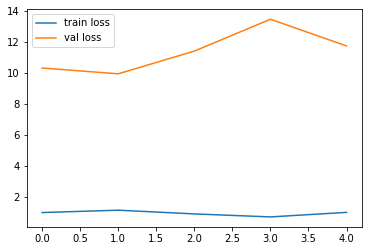

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


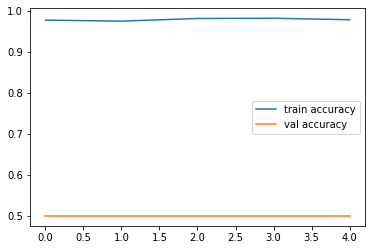

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
test_set = test_datagen.flow_from_directory('chest_xray/val',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode= 'categorical')
                                                 

Found 16 images belonging to 2 classes.


In [23]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=1,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


163/163 [==============================] - 105s 645ms/step - loss: 1.2854 - accuracy: 0.9749 - val_loss: 8.0054 - val_accuracy: 0.5000


In [31]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')